# 1. Principal Component Analysis

First import all required modules:

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Use the given toy data set:

In [51]:
X = np.array([[2., 13.], [1., 3.], [6., 19.],
              [7., 18.], [5., 17.], [4., 9.],
              [5., 22.], [6., 11.], [8., 25.]])

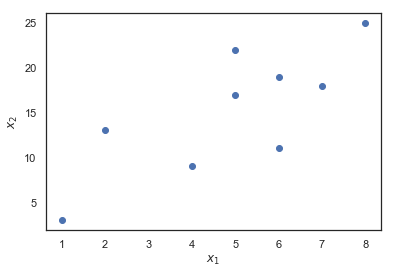

In [3]:
plt.scatter(X[:,0], X[:, 1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$');

#### Question 1. What is the angle between the x1 axis and the vector corresponding to the first principal component for this data (don't forget to rescale the data using StandardScaler)?

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
X_scaled

array([[-1.35534369, -0.3430981 ],
       [-1.82450112, -1.88703953],
       [ 0.52128604,  0.58326676],
       [ 0.99044347,  0.42887262],
       [ 0.0521286 ,  0.27447848],
       [-0.41702883, -0.96067467],
       [ 0.0521286 ,  1.04644919],
       [ 0.52128604, -0.65188638],
       [ 1.4596009 ,  1.50963162]])

In [6]:
np.linalg.eig(X_scaled.T.dot(X_scaled))[1]

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [7]:
alpha = []
beta = []
gamma = []
for i in range(X_scaled.shape[0]):
    alpha.append((X_scaled[i][0])**2)
    beta.append((X_scaled[i][1])**2)
    gamma.append(2*(X_scaled[i][0])*(X_scaled[i][1]))
print(sum(alpha))
print(sum(beta))
print(sum(gamma))

9.0
9.0
13.939744076855163


z = 9$α^2$ + 13.93αβ + 9$β^2$ => <br>
z = 9 + 13.93αβ<br>

при минимизации αβ получаем, что α = -β, поэтому две компоненты будут под 45 градусов к оси x1

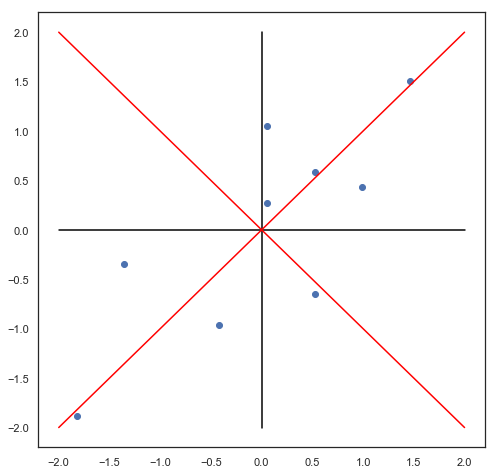

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.plot([-2,2],[0,0], c='black')
plt.plot([0,0],[-2,2], c='black')
plt.plot([-2,2],[2,-2], c='red')
plt.plot([-2,2],[-2,2], c='red');

In [9]:
from scipy.linalg import svd
U, Sigma, VT = svd(X_scaled)
VT

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

Proportion of variance explained by each component:
1st component - 0.8872,
2nd component - 0.1128

Directions of principal components:
1st component: [-0.70710678 -0.70710678] 
2nd component: [ 0.70710678 -0.70710678]


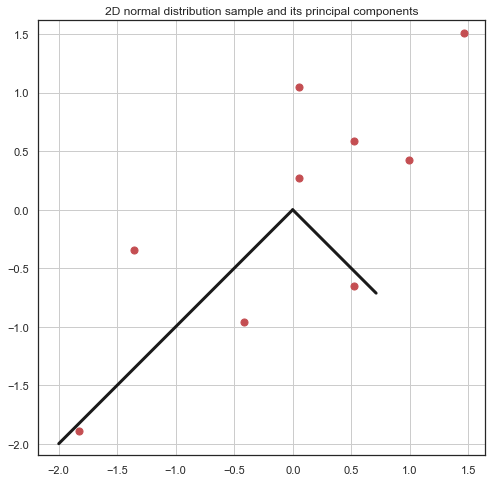

In [54]:
pca = PCA()
pca.fit(X_scaled)
print('Proportion of variance explained by each component:\n' +\
      '1st component - %.4f,\n2nd component - %.4f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

plt.figure(figsize=(8,8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 3 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.grid()
plt.show()

#### Answer(1): 45 degrees

#### Question 2. What are the eigenvalues of the $X^TX$ matrix, given X is a rescaled matrix of the toy dataset?

In [55]:
np.round(np.linalg.eig(X_scaled.T.dot(X_scaled))[0],2).tolist()

[15.97, 2.03]

In [62]:
np.linalg.eig(X_scaled.T.dot(X_scaled))[0]

array([15.96987204,  2.03012796])

In [56]:
pca.explained_variance_ratio_

array([0.88721511, 0.11278489])

#### Answer(2): 15.97 and 2.03

#### Question 3. What is the meaning of the two numbers from the previous question?

In [13]:
from scipy.linalg import svd
U, Sigma, VT = svd(X_scaled)

In [14]:
Sigma**2

array([15.96987204,  2.03012796])

In [63]:
 pca.singular_values_**2

array([15.96987204,  2.03012796])

#### Answer(3):
- their squares tell what part of the initial data's variance is explained by principal components
- they define a rotation angle between the first principal component and the initial axis
- those numbers tell what part of the initial data's variance is explained by principal components **[+]**
- the square roots of those numbers define a rotation angle between the first principal component and the initial axis


Let's load a dataset of peoples' faces and output their names. (This step requires stable, fast internet connection.)

In [15]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair


Let's look at some faces. All images are stored in a handy `lfw_people.images` array.

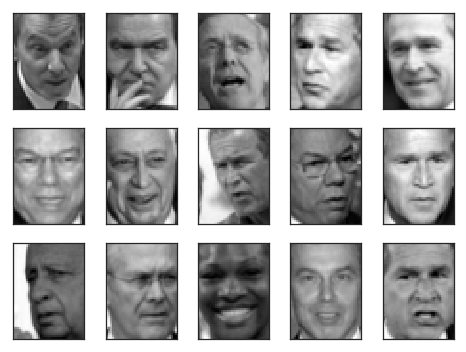

In [16]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='gray')

#### Question 4. What minimal principal component number is needed to explain 90% of data variance (scaled using StandardScaler)?

In [17]:
X = lfw_people.data

In [18]:
y = lfw_people.target

In [19]:
X.shape

(1560, 1850)

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled .shape

(1560, 1850)

In [21]:
pca = PCA(n_components=77, svd_solver='randomized', random_state=1).fit(X_scaled)
X_pca = pca.transform(X_scaled)
np.cumsum(pca.explained_variance_ratio_)[-1]

0.90019166

In [22]:
pca = PCA(0.9, random_state=1).fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape[1]

77

In [24]:
X_pca.shape

(1560, 77)

In [23]:
pca = PCA(0.9, random_state=1).fit(X_scaled)
print('We need %d components to explain 90%% of variance' 
      % pca.n_components_)

We need 77 components to explain 90% of variance


77 principal components explain 90.02% of variance


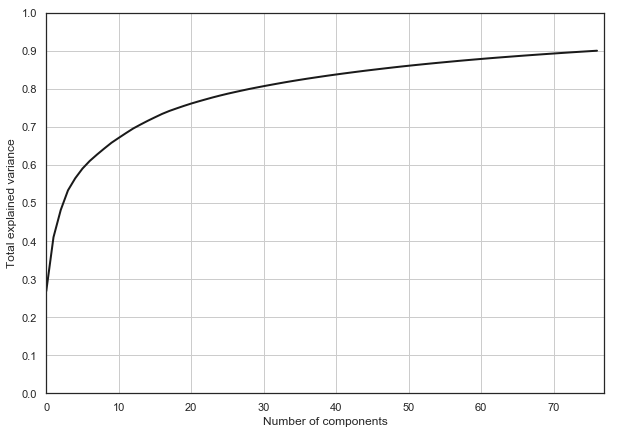

In [25]:
pca = PCA(n_components=77, svd_solver='randomized', random_state=1).fit(X_scaled)

print('77 principal components explain %.2f%% of variance' %
      (100 * np.cumsum(pca.explained_variance_ratio_)[-1]))
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='k')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 77)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

#### Answer(4): 77

Print a picture showing the first 30 principal components (don't be scared when you see the results). In order to create it, use 30 vectors from pca.components_, reshape them to their initial size (50 x 37), and display.

#### Question 5. Within the first 30 principal components, which one brightens the left side of the face? More specifically, which principal component corresponds to a linear combination of the initial features (pixels' intensity), which, when shown as an image, looks like a photo highlighted from the left side?

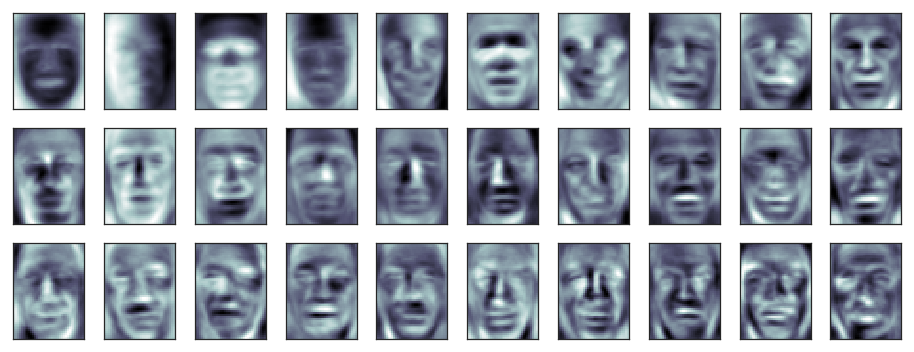

In [26]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap='bone')

#### Answer(5): 2

Now let's create a projection of faces onto the space of the first two principal components.

#### Question 6. Who looks the least similar to the other people in the dataset if we only consider the two first principal components?

To answer this question, take the first two principal components from the rescaled data, evaluate two mean principal components' values for each person over all their images in the dataset (again, use both `svd_solver='randomized'` and `random_state=1`). Then, with 12 two-dimensional points, find the one which has the largest distance from the others (by Euclidean distance). You can do this either precisely or approximately using `sklearn.metrics.euclidean_distances` and `seaborn.heatmap`.

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(lfw_people.data)
pca = PCA(n_components=2, svd_solver='randomized', random_state=1)
X_reduced = pca.fit_transform(X_scaled)

In [27]:
data = pd.DataFrame(X_reduced)
data['target'] = pd.Series(lfw_people.target)
data_gb = data.groupby('target').mean()

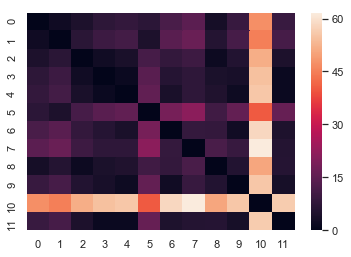

In [28]:
sns.heatmap(euclidean_distances(data_gb));

Projecting 1850-dimensional data to 2D


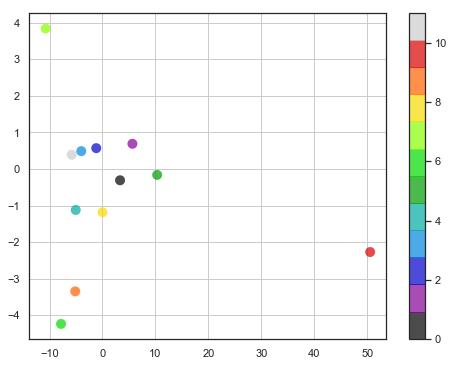

In [29]:
print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

plt.figure(figsize=(8,6))
plt.scatter(data_gb[0], data_gb[1],
            c=data_gb.index, edgecolor='none',
            alpha=0.7, s=100, cmap=plt.cm.get_cmap('nipy_spectral', 12))
plt.colorbar()
plt.grid()
plt.show()

In [30]:
lfw_people.target_names[10]

'Serena Williams'

#### Answer(6): Serena Williams

# 2. Clustering

For the next question, load the housing prices dataset:

In [31]:
from tqdm import tqdm_notebook

In [32]:
boston = datasets.load_boston()
X = boston.data

Using the elbow-method (reference article 7 of the course), find the optimal number of clusters to set as a hyperparameter for the k-means algorithm.

#### Question 7. What is the optimal number of clusters to use on housing prices data set according to the elbow-method? Use random_state=1 in the k-means method, and don't rescale the data.

In this case, we are looking for the most significant curve fracture on the `Cluster number vs Centroid distances` graph. Consider the number of clusters from 2 to 10. Use `random_state=1` for the k-means algorithm initialization.

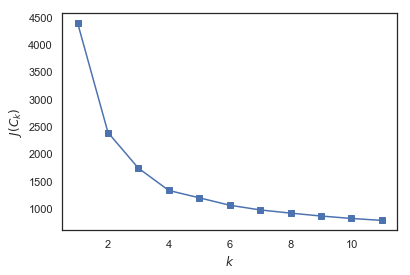

In [33]:
inertia = []
for k in tqdm_notebook(range(1, 12)):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 12), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [34]:
d = {}
for k in range(2, 11):
    i = k - 1
    d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])

In [35]:
d

{2: 0.3249291646508842,
 3: 0.6249487560756805,
 4: 0.3277849034092021,
 5: 1.0180678383143424,
 6: 0.6315470011002378,
 7: 0.6806714202923276,
 8: 0.906794257006407,
 9: 0.8422722108106715,
 10: 0.797474946877946}

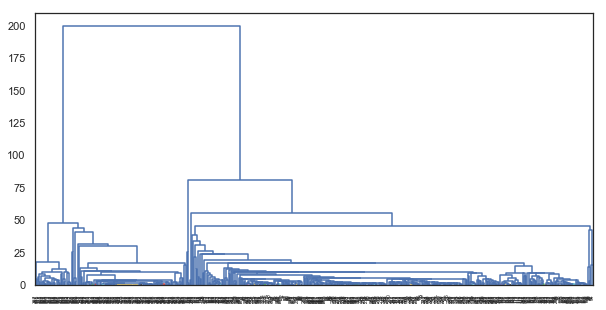

In [36]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = boston.data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

distance_mat = pdist(X_reduced) # pdist calculates the upper triangle of the distance matrix

Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

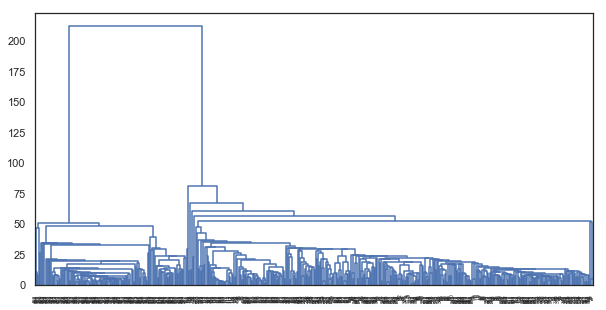

In [37]:
X = boston.data

distance_mat = pdist(X) # pdist calculates the upper triangle of the distance matrix

Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

#### Answer(7): 2

Go back to the faces dataset. Imagine that we did not know the names for who was each photo but that we knew that there were 12 different people. Let's compare clustering results from 4 algorithms - k-means, Agglomerative clustering, Affinity Propagation, and Spectral clustering. Use the same respective parameters as in the end of this article, only change the number of clusters to 12.

In [38]:
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering



X, y = lfw_people.data, lfw_people.target

algorithms = []
algorithms.append(KMeans(n_clusters=12, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=12, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=12))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.021408,0.063603,0.091011,0.079034,0.084601,0.044818
Affinity,0.011914,0.070306,0.276561,0.138802,0.184837,0.020919
Spectral,0.034789,0.078949,0.101884,0.095728,0.098710,0.039245
Agglomerative,0.017810,0.061899,0.085239,0.078682,0.081829,0.025734


In [44]:
(lfw_people.target==10).astype('int64')

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
X, y = lfw_people.data, (lfw_people.target==10).astype('int')

algorithms = []
algorithms.append(KMeans(n_clusters=2, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=2, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=2))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.027111,0.042255,0.199435,0.042710,0.070353,0.119469
Affinity,0.001522,0.017064,0.674640,0.023224,0.044902,0.020919
Spectral,0.110283,0.070189,0.282434,0.070707,0.113099,0.132204
Agglomerative,0.268697,0.135005,0.386218,0.135689,0.200823,0.143858


#### Question 8. Select all of the correct statements:

#### Answer(8):
- Agglomerative clustering worked better than others by all metrics
- Clustering results are disappointing - there isn't a metric that exceeds 0.35 **[+]**
- Affinity Propagation worked better than Spectral clustering by all metrics
- Considering only 2 clusters (whether it is Serena Williams or not) and comparing clustering results with a binary vector, we can see that clustering algorithms work better, with some metrics exceeding 66% **[+]**


Use the coordinates of the 12 "average" people's images you got before. Draw a dendrogram for them. Use `scipy.cluster.hierarchy` and `scipy.spatial.distance.pdist`, take parameters values from the appropriate example in the article.

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(lfw_people.data)
pca = PCA(n_components=2, svd_solver='randomized', random_state=1)
X_reduced = pca.fit_transform(X_scaled)

In [63]:
data = pd.DataFrame(X_reduced)
data['target'] = pd.Series(lfw_people.target)
data_gb = data.groupby('target').mean()

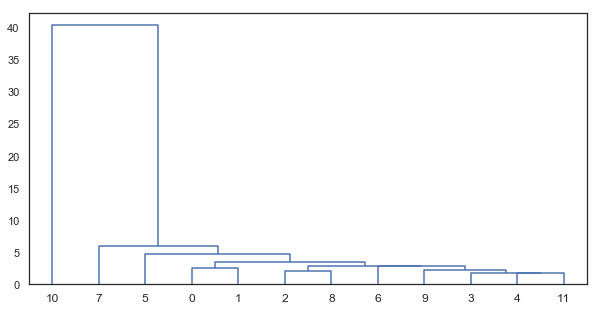

In [79]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X_lol = data_gb.iloc[:,0:2].values


distance_mat = pdist(X_lol) # pdist calculates the upper triangle of the distance matrix

Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

#### Question 9. Look at the dendrogram and consider a step when just two clusters are left: Serena Williams vs. all. Who was the last person added to the "big" cluster?

In [82]:
lfw_people.target_names[7]

'Jean Chretien'

#### Answer(9): Jean Chretien